In [54]:
import numpy as np
import pandas as pd
import urllib



## Download images

In [ ]:

#imports here
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import time



In [ ]:
driver = webdriver.Chrome('/Users/sanyuja/node_modules/chromedriver/lib/chromedriver/chromedriver')



In [ ]:
df = pd.read_csv("NLP_Filtered_Data.csv")

In [ ]:
photos = df[df['post_image']!='[None]']['post_image']

In [ ]:
photos

In [ ]:
photos_df = pd.DataFrame(index = photos.index)

In [ ]:
photos_df['src'] = photos.values

In [ ]:
lists = []
for x in photos_df['src']:
    lists.append((x)[2:-2])



In [ ]:
photos_df['src'] = lists

In [ ]:
photos_df["ind"] = photos_df.index

In [ ]:
photos_df[photos_df['src'] == photos_df['src'].iloc[0]]['ind']

In [ ]:

import os
import wget

path = os.getcwd()
path = os.path.join(path, "500 "+ "s")

#create the directory
os.mkdir(path)

path

In [ ]:
photos_df['src'].iloc[0]

In [ ]:
from urllib.request import urlopen, Request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
reg_url = photos_df['src'].iloc[6]
req = Request(url=reg_url, headers=headers) 
html = urlopen(req).read() 
print(html) 

#urllib.request.urlretrieve(photos_df['src'].iloc[0], "captcha.png")


In [ ]:
for x in photos_df['src']:
    print(x)

In [ ]:

#download images
counter = 0
for image in photos_df['src']:
    try:
        save_as = os.path.join(path,  photos_df[photos_df['src']==image]['ind'] + str(counter) + '.jpg')
        wget.download(image, save_as)
        counter += 1
    except:   
        pass

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [ ]:
model.summary()

In [ ]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('all_photos/16.jpg', target_size=(224, 224))

In [ ]:

from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [ ]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [ ]:
# predict the probability across all output classes
yhat = model.predict(image)

In [ ]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

In [ ]:
label = decode_predictions(yhat)

In [ ]:
label[0][0]

In [ ]:
photo_id=[]
pred_cap = []
percent_pred = []
for x in photos_df['ind']:
    try:
        image = load_img(f'all_photos/{x}.jpg', target_size=(224, 224))
        image = img_to_array(image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        yhat = model.predict(image)
        label = decode_predictions(yhat)
        label = label[0][0]

        photo_id.append(x)
        pred_cap.append(label[1])
        percent_pred.append(label[2]*100)
    except:
        pass

In [ ]:
VGG16_df = pd.DataFrame({'ind':photo_id,'Pred_caption':pred_cap,'percent_sure':percent_pred})

In [ ]:
VGG16_df

### Age and gender detection:
https://github.com/yu4u/age-gender-estimation

In [ ]:
from pyagender import PyAgender

agender = PyAgender() 
# see available options in __init__() src
image = load_img('all_photos/16.jpg')
faces = agender.detect_genders_ages(image)

In [ ]:

pip uninstall keras

In [ ]:
pip install keras

In [ ]:
pip install face_recognition


In [ ]:
keras.__version__

In [ ]:
tensorflow.__version__

In [ ]:
pip install https://pypi.python.org/packages/da/06/bd3e241c4eb0a662914b3b4875fc52dd176a9db0d4a2c915ac2ad8800e9e/dlib-19.7.0-cp36-cp36m-win_amd64.whl#md5=b7330a5b2d46420343fbed5df69e6a3f


### Get text from images:
https://www.pyimagesearch.com/2017/07/10/using-tesseract-ocr-python/

In [ ]:
pip install pytesseract
pip install pillow

In [ ]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image to be OCR'd")
ap.add_argument("-p", "--preprocess", type=str, default="thresh",
	help="type of preprocessing to be done")
args = vars(ap.parse_args())

In [ ]:
pip install dLib

In [ ]:
pip install cmake

### Emotion detect:
https://towardsdatascience.com/face-detection-recognition-and-emotion-detection-in-8-lines-of-code-b2ce32d4d5de

In [2]:
from PIL import Image
import tensorflow as tf

from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

Using TensorFlow backend.


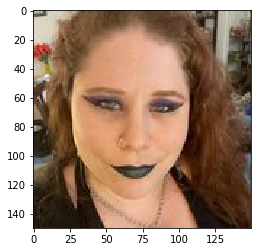

In [45]:
image = face_recognition.load_image_file('all_photos/43.jpg')
plt.imshow(image)

In [46]:
face_locations = face_recognition.face_locations(image)
face_locations[0]

(46, 116, 136, 26)

In [47]:

top, right, bottom, left = face_locations[0]
face_image = image[top:bottom, left:right]
face_image

array([[[ 70,  41,   7],
        [ 92,  59,  24],
        [143, 105,  69],
        ...,
        [ 51,  18,   0],
        [ 59,  24,   5],
        [ 72,  37,  18]],

       [[ 59,  30,   0],
        [ 98,  65,  30],
        [162, 124,  88],
        ...,
        [ 51,  18,   0],
        [ 58,  25,   6],
        [ 73,  38,  19]],

       [[ 68,  31,  12],
        [ 95,  55,  30],
        [191, 148, 116],
        ...,
        [ 62,  29,  12],
        [ 54,  21,   4],
        [ 80,  47,  30]],

       ...,

       [[ 40,  22,   8],
        [ 46,  27,  13],
        [147, 128, 113],
        ...,
        [ 23,  13,  11],
        [ 28,  17,  13],
        [ 32,  19,  13]],

       [[ 38,  22,   9],
        [ 26,  10,   0],
        [112,  94,  82],
        ...,
        [ 22,  14,  11],
        [ 26,  17,  12],
        [ 29,  18,  12]],

       [[ 45,  31,  20],
        [ 27,  13,   2],
        [ 76,  59,  49],
        ...,
        [ 24,  16,  13],
        [ 25,  18,  12],
        [ 29,  20,  15]]

In [48]:
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])
face_image

array([[[[ 41],
         [119],
         [154],
         ...,
         [ 33],
         [ 22],
         [ 30]],

        [[ 41],
         [153],
         [151],
         ...,
         [ 31],
         [ 26],
         [ 35]],

        [[ 55],
         [161],
         [156],
         ...,
         [ 26],
         [ 13],
         [ 41]],

        ...,

        [[ 70],
         [103],
         [ 25],
         ...,
         [ 22],
         [ 15],
         [ 15]],

        [[ 30],
         [118],
         [ 13],
         ...,
         [ 17],
         [ 14],
         [ 18]],

        [[ 18],
         [ 83],
         [ 14],
         ...,
         [ 19],
         [ 15],
         [ 18]]]], dtype=uint8)

In [49]:
model = load_model("model_v6_23.hdf5")
predicted_class = np.argmax(model.predict(face_image))

In [50]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [51]:
predicted_label

'Surprise'

In [52]:
photo_id=[]
emotion = []
model = load_model("model_v6_23.hdf5")
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}
label_map = dict((v,k) for k,v in emotion_dict.items()) 


for x in range(0,4000):
    try:
        image = face_recognition.load_image_file(f'all_photos/{x}.jpg')
        face_locations = face_recognition.face_locations(image)
        top, right, bottom, left = face_locations[0]
        face_image = image[top:bottom, left:right]
        face_image = cv2.resize(face_image, (48,48))
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])
        predicted_class = np.argmax(model.predict(face_image))
        emotion.append(label_map[predicted_class])
        photo_id.append(x)
        print(x)
    except:
        continue

24
26
27
30
38
43
44
50
56
93
101
102
103
104
134
168
170
184
197
209
213
215
217
225
226
228
229
231
237
238
239
241
244
245
246
248
250
251
254
259
262
263
264
265
268
269
270
271
273
274
276
277
278
284
291
297
301
302
303
305
307
308
309
310
311
312
314
317
321
322
323
324
326
327
335
338
339
343
344
345
349
352
353
355
356
357
363
374
378
379
382
383
390
391
393
394
395
397
398
400
403
408
412
413
418
421
423
427
429
430
435
440
444
445
446
447
448
452
459
460
463
465
466
467
469
473
474
480
482
483
485
488
489
490
491
495
500
501
504
505
511
515
526
534
537
550
574
598
600
618
660
664
665
670
677
679
682
685
689
703
704
705
706
710
715
716
722
732
733
737
741
744
745
746
749
755
757
759
761
763
764
771
772
774
775
780
789
790
795
800
801
803
806
807
808
809
814
818
820
827
833
835
837
841
845
851
852
853
854
858
862
863
864
865
870
871
872
877
880
884
890
891
892
893
895
904
906
907
908
911
914
915
916
919
920
925
929
931
933
935
938
943
945
946
947
948
949
950
955
956
961
964
96

In [55]:
emotions = pd.DataFrame({'ind':photo_id,'emotion':emotion})
emotions.to_csv("emotion.csv")

In [56]:
emotions

,ind,emotion
0,24,Surprise
1,26,Surprise
2,27,Fear
3,30,Happy
4,38,Happy
...,...,...
1207,3973,Fear
1208,3974,Fear
1209,3975,Surprise
1210,3976,Happy
